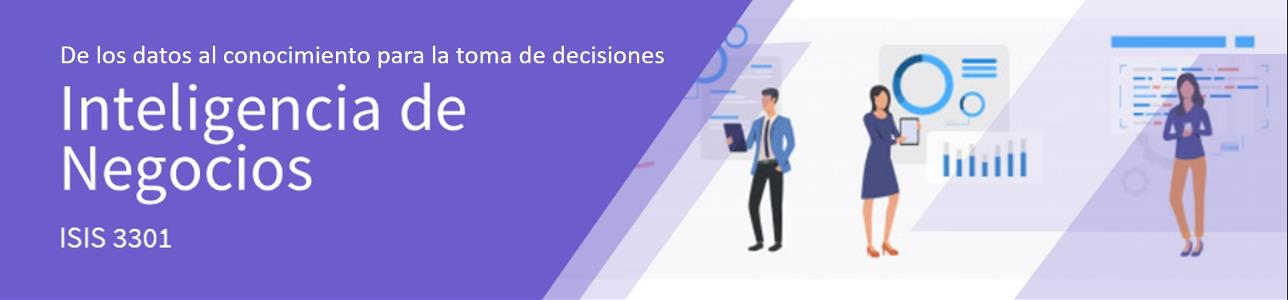

## Problema
El Fondo de Poblaciones de las Naciones Unidas (UNFPA) junto con entidades públicas y haciendo uso de diferentes herramientas de participación ciudadana, busca identificar problemas y evaluar soluciones actuales, relacionando la información dada por los ciudadanos con los diferentes Objetivos de Desarrollo Sostenible (ODS). Los ODS fueron adoptados por las Naciones Unidas en 2015 como un llamamiento universal para poner fin a la pobreza, proteger el planeta y garantizar que para el 2030 todas las personas disfruten de paz y prosperidad.

En este contexto, uno de los procesos que requiere mayor esfuerzo es el análisis de la información textual recopilada, ya que consume muchos recursos, que incluyen la participación de un experto. Es así como el UNFPA quiere desarrollar un proyecto, donde el objetivo principal es relacionar de forma automática opiniones de los ciudadanos con los ODS 3, 4 y 5.

## 1. Instalación e importanción de librerías.


In [1]:
# librería Natural Language Toolkit, usada para trabajar con textos
!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=73c9b228caad777e32b5ffc8f8609e95f81aa270242f66e173f2ac6acaa743a5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [2]:
# Instalación de librerias
import pandas as pd
import numpy as np

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

from wordcloud import STOPWORDS

from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt

import joblib

## 2. Perfilamiento y entendimiento de los datos



### 2.1. Lectura de los datos

In [3]:
data = pd.read_excel("/content/ODScat_345.xlsx")
data.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


### 2.2. Entendimiento de los Datos

In [5]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Preparación de datos

### 3.1. Limpieza de los datos

Al estar lidiando con textos, las palabras que más aparecerán son netamente gramaticales, como conjunciones y artículos, para el caso del español. Para eliminar dicho ruido, se usa la librería de stopwords para limpiar la data y tener resultados más significativos. Adicionalmente, para eliminar el ruido, se puede eliminar la puntuación, mayúsculas, acentos y en general todo caracter que no ASCII. Finalmente, podemos convertir todo número a su representación en letras, con esto nos aseguramos de que todos los datos son caracteres validos de ASCII, reduciendo así el ruido.

In [6]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### 3.2. Normalización

Agregamos normalización para eliminar sufijos, prefijos y lematizar verbos a sus raíces.

In [7]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

### 3.3. Tokenización

Adicionalmente a la limpieza, resulta útil tokenizar los datos, esto nos permite luego separar frases completas.

In [8]:
textos_t = data["Textos_espanol"].apply(word_tokenize)

textos_t = textos_t.apply(preproccesing)

data["TextosT"] = textos_t.apply(stem_and_lemmatize)

In [9]:
data['TextosT'] = data['TextosT'].apply(lambda x: ' '.join(map(str, x)))

## 4. Modelado


In [10]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    def remove_non_ascii(self, words):
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        X_train = pd.Series(X)
        X_train = X_train.apply(contractions.fix)
        X_train = X_train.apply(word_tokenize)
        X_train = X_train.apply(lambda x: self.preproccesing(x))
        X_train = X_train.apply(lambda x: self.stem_and_lemmatize(x))
        X_train = X_train.apply(lambda x: ' '.join(map(str, x)))
        return X_train

Separamos los datos limpios para probar y entrenar.

In [11]:
clean_data = data.copy()
clean_data = clean_data.drop(columns=['Textos_espanol'])

In [12]:
train, test = train_test_split(clean_data, test_size=0.2, random_state=33)
train.head()

,sdg,TextosT
1464,4,atribut requer tambi ampli ocasion inclu lider...
1721,4,law cell aoecircul primer exig marc legal clar...
1606,4,segund lug si quier implement exit component i...
2492,5,embarg si bien credit contribucion pued ser he...
2005,5,tambi import sensibiliz educ derech human pers...


In [13]:
X_train, y_train = train['TextosT'], train['sdg']
display(X_train)
y_train

,TextosT
1464,atribut requer tambi ampli ocasion inclu lider...
1721,law cell aoecircul primer exig marc legal clar...
1606,segund lug si quier implement exit component i...
2492,embarg si bien credit contribucion pued ser he...
2005,tambi import sensibiliz educ derech human pers...
...,...
2706,mujer migrant mayor pued enfrent desafi adicio...
578,pued bas edad sex nivel ingres grup riesg func...
1752,rubric pretend ayud profesor ser mas sistemat ...
2439,invers incapac logr enfoqu wholeofgovernment c...


,sdg
1464,4
1721,4
1606,4
2492,5
2005,5
...,...
2706,5
578,3
1752,4
2439,5


### 4.1. Modelo SVM

In [14]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', SVC(kernel='linear', probability=True))
    ]

pipe_SVM = Pipeline(estimators)

pipe_SVM.fit(X_train, y_train)

CPU times: user 19.1 s, sys: 73 ms, total: 19.2 s
Wall time: 19.6 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', SVC(kernel='linear', probability=True))])

In [15]:
y_pred_train_SVM = pipe_SVM.predict(X_train)
y_pred_train_SVM

array([4, 4, 4, ..., 4, 5, 5])

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

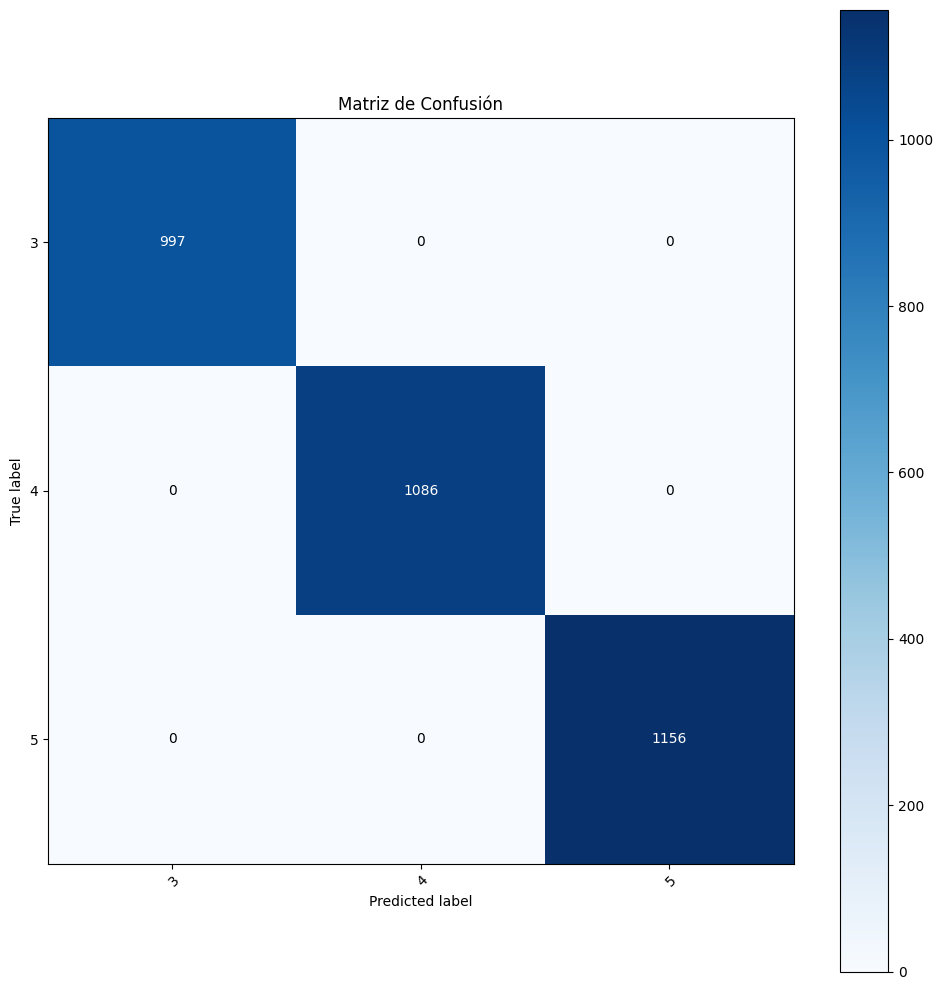

In [17]:
%matplotlib inline

classes = pipe_SVM['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_SVM, classes=classes,
                      title='Matriz de Confusión')

In [18]:
report_SVC = classification_report(y_train, y_pred_train_SVM)

print("Reporte de Entrenamiento para Support Vector Machines\n", report_SVC)

Reporte de Entrenamiento para Support Vector Machines
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       997
           4       1.00      1.00      1.00      1086
           5       1.00      1.00      1.00      1156

    accuracy                           1.00      3239
   macro avg       1.00      1.00      1.00      3239
weighted avg       1.00      1.00      1.00      3239



In [19]:
precision = accuracy_score(y_train, y_pred_train_SVM)

print("Precisión del modelo:", precision)

Precisión del modelo: 1.0


### 4.2. Modelo Naive Bayes

In [20]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', MultinomialNB())
    ]

pipe_NB = Pipeline(estimators)

pipe_NB.fit(X_train, y_train)

CPU times: user 11.1 s, sys: 31.7 ms, total: 11.1 s
Wall time: 11.3 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', MultinomialNB())])

In [21]:
y_pred_train_NB = pipe_NB.predict(X_train)
y_pred_train_NB

array([4, 5, 4, ..., 4, 5, 5])

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

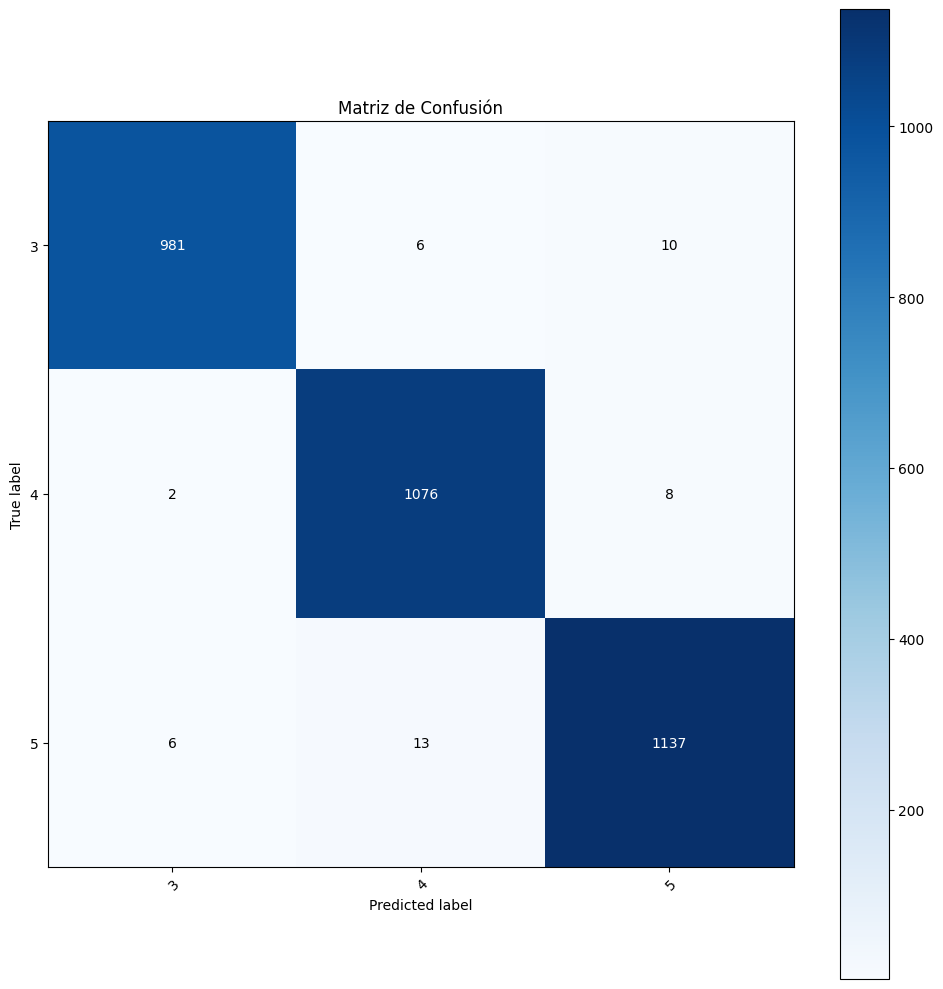

In [22]:
%matplotlib inline

classes = pipe_NB['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_NB, classes=classes,
                      title='Matriz de Confusión')

In [23]:
report_NB = classification_report(y_train, y_pred_train_NB)

print("Reporte de Entrenamiento para Naive Bayes\n", report_NB)

Reporte de Entrenamiento para Naive Bayes
               precision    recall  f1-score   support

           3       0.99      0.98      0.99       997
           4       0.98      0.99      0.99      1086
           5       0.98      0.98      0.98      1156

    accuracy                           0.99      3239
   macro avg       0.99      0.99      0.99      3239
weighted avg       0.99      0.99      0.99      3239



In [24]:
precision = accuracy_score(y_train, y_pred_train_NB)

print("Precisión del modelo:", precision)

Precisión del modelo: 0.9861068230935474


### 4.3. Modelo Random Forest

In [25]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', RandomForestRegressor())
    ]

pipe_RF = Pipeline(estimators)

pipe_RF.fit(X_train, y_train)

CPU times: user 41.8 s, sys: 69.6 ms, total: 41.9 s
Wall time: 42.7 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', RandomForestRegressor())])

In [26]:
y_pred_train_RF = pipe_RF.predict(X_train)
y_pred_train_RF

array([4.35, 4.06, 4.  , ..., 3.98, 4.94, 5.  ])

In [27]:
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)

mae_train_RF = mean_absolute_error(y_train, y_pred_train_RF)

r2_train_RF = r2_score(y_train, y_pred_train_RF)

print("Métricas de rendimiento en el conjunto de entrenamiento:")
print("Error cuadrático medio - Mean Squared Error (MSE):", mse_train_RF)
print("Error absoluto medio - Mean Absolute Error (MAE):", mae_train_RF)
print("R cuadrado - R-squared (R^2):", r2_train_RF)

Métricas de rendimiento en el conjunto de entrenamiento:
Error cuadrático medio - Mean Squared Error (MSE): 0.01262417412781723
Error absoluto medio - Mean Absolute Error (MAE): 0.04044149428836057
R cuadrado - R-squared (R^2): 0.9809389339615554


# Etiquetado de nuevos datos a partir del modelo

In [30]:
new_data = pd.read_excel('/content/TestODScat_345.xlsx')

joblib.dump(pipe_NB, 'NB_pipeline.pkl') # Changed from pipe_NB to pipe_RF
loaded_pipeline = joblib.load('NB_pipeline.pkl')

text_data = new_data['Textos_espanol']
predictions = loaded_pipeline.predict(text_data)

new_data['sdg'] = predictions
new_data.to_excel('TestODScat_345_tagged.xlsx', index=False)